<a href="https://colab.research.google.com/github/sidkatiyar09/Applied-Machine-Learning/blob/main/food_dataset_2_categories_only_capstone_GOOGLENET_(INCEPTIONV3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# !pip install tensorflow
# !pip install keras.image.ImageDataGenerator

ERROR: Could not find a version that satisfies the requirement keras.image.ImageDataGenerator (from versions: none)
ERROR: No matching distribution found for keras.image.ImageDataGenerator


In [43]:
# GOOGLENET (INCEPTIONV3) TRAINING ON 1 MILLION IMAGES (TRANSFER LEARNING)

# ============================
# SETUP
# ============================

# !pip install tensorflow opencv-python -q

import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from keras import layers

# ============================
# DATASET CONFIGURATION
# ============================

# Adjust path to your root image folder
DATA_DIR = "/content/drive/MyDrive/Capstone project 2/food_subset_shared_final"
BATCH_SIZE = 64
IMG_SIZE = (299, 299)  # Required input size for InceptionV3

train_ds = image_dataset_from_directory(
    DATA_DIR + "/train",
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    validation_split=None  # Assuming already pre-split
)




Found 600 files belonging to 2 classes.


In [29]:

class_names = train_ds.class_names
class_names

['dessert', 'main_course']

In [30]:

num_classes = len(class_names)
num_classes

2

In [44]:
val_ds = image_dataset_from_directory(
    DATA_DIR + "/val",
    shuffle=False,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)



Found 600 files belonging to 2 classes.


In [45]:


test_ds = image_dataset_from_directory(
    DATA_DIR + "/test",
    shuffle=False,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)


Found 600 files belonging to 2 classes.


In [46]:
from keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
data_augment= keras.Sequential(
    [
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.3),
        layers.RandomFlip('vertical')
    ]
)

In [34]:
from keras.applications.inception_v3 import InceptionV3


<!-- # GOOGLENET (INCEPTIONV3) TRAINING ON 1 MILLION IMAGES (TRANSFER LEARNING)

# ============================
# SETUP
# ============================

# !pip install tensorflow opencv-python -q

# import tensorflow as tf
# from tensorflow.keras.applications import InceptionV3
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
# from tensorflow.keras.models import Model
# from tensorflow.keras.preprocessing import image_dataset_from_directory
# import matplotlib.pyplot as plt

# # ============================
# # DATASET CONFIGURATION
# # ============================

# # Adjust path to your root image folder
# DATA_DIR = "/content/drive/MyDrive/Capstone project 2/food_subset_shared_final"
# BATCH_SIZE = 64
# IMG_SIZE = (299, 299)  # Required input size for InceptionV3

# train_ds = image_dataset_from_directory(
#     DATA_DIR + "/train",
#     shuffle=True,
#     batch_size=BATCH_SIZE,
#     image_size=IMG_SIZE,
#     validation_split=None  # Assuming already pre-split
# )

# val_ds = image_dataset_from_directory(
#     DATA_DIR + "/val",
#     shuffle=False,
#     batch_size=BATCH_SIZE,
#     image_size=IMG_SIZE
# )

# test_ds = image_dataset_from_directory(
#     DATA_DIR + "/test",
#     shuffle=False,
#     batch_size=BATCH_SIZE,
#     image_size=IMG_SIZE
# )

# class_names = train_ds.class_names
# num_classes = len(class_names) -->

# GOOGLENET (INCEPTIONV3) TRAINING ON 1 MILLION IMAGES (TRANSFER LEARNING)

============================
SETUP
============================

!pip install tensorflow opencv-python -q

import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

# ============================
# DATASET CONFIGURATION
# ============================

# Adjust path to your root image folder
DATA_DIR = "/content/drive/MyDrive/Capstone project 2/food_subset_shared_final"
BATCH_SIZE = 64
IMG_SIZE = (299, 299)  # Required input size for InceptionV3

train_ds = image_dataset_from_directory(
    DATA_DIR + "/train",
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    validation_split=None  # Assuming already pre-split
)

val_ds = image_dataset_from_directory(
    DATA_DIR + "/val",
    shuffle=False,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

test_ds = image_dataset_from_directory(
    DATA_DIR + "/test",
    shuffle=False,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

class_names = train_ds.class_names
num_classes = len(class_names)

============================
INCEPTIONV3 (GOOGLENET) TRANSFER LEARNING MODEL
============================
#don;t use the following since image_from_dataset scales images
 xtrain=image.img_to_array(train_ds)
 xtrain=np.expand_dims(xtrain,axis=0)
 x=preprocess_input(xtrain)
 xval=preprocess_input(np.arraxy(val_ds))/255.0
 xtest=preprocess_input(np.array(test_ds))/255.0


# scaling


In [68]:
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
import numpy as np

rescaling=keras.Sequential([
    layers.Rescaling(1/255.0)
])
# xtrain=train_ds.map(lambda x,y :(x,y)) when both image and label needed
# xtrain=xtrain.map(lambda x,y :(rescaling(x,(y))))
xtrain=train_ds.map(lambda x,y: x)
xtrain=xtrain.map(lambda x,y:rescaling(x))


In [69]:
# xtest = test_ds.map(lambda x, y: (rescaling(x), y))  # ✅ Works

xval=val_ds.map(lambda x,y:x)
xval=val_ds.map(lambda x,y:rescaling(x))

In [70]:
# xtest =test_ds.map(lambda x,y:x,y)
xtest=test_ds.map(lambda x,y:(rescaling(x),y))

# base model inceptionv3

In [71]:

base_model = InceptionV3(include_top=False, weights="imagenet", input_shape=(299, 299, 3))
base_model.trainable = False

# using predict method fro faster processing

In [73]:
train_pred=base_model.predict(xtrain)
val_pred=base_model.predict(xval)
test_pred=base_model.predict(xtest)


10/10 ━━━━━━━━━━━━━━━━━━━━ 92s 9s/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 91s 9s/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 90s 9s/step


#binary classifier

In [ ]:
x = GlobalAveragePooling2D()(base_model.output)
# x=layers.Flatten()(x)
x = Dense(256, activation='relu')(x)
# output = Dense(num_classes, activation='sigmoid')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#saving model via callback modelcheckpoint

In [85]:
from keras.callbacks import ModelCheckpoint

callback1=ModelCheckpoint(
    filepath='/content/drive/MyDrive/Capstone project 2/capInception1.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max' ,#mode='auto' chooses max for when monitor=val_accuracy monitoring only accuracy,
               #when monitor = loss we or it chooses mode= min
    save_freq='epoch',
    verbose=1
)



#training

In [75]:
# ============================
# TRAINING
# ============================

EPOCHS = 10
history = model.fit(xtrain, validation_data=xval, epochs=EPOCHS,callbacks=[callback1])

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 196s 20s/step - accuracy: 0.6330 - loss: 0.9786 - val_accuracy: 0.7917 - val_loss: 0.3931
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 183s 19s/step - accuracy: 0.8574 - loss: 0.3030 - val_accuracy: 0.9317 - val_loss: 0.1912
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 182s 19s/step - accuracy: 0.9473 - loss: 0.1437 - val_accuracy: 0.9283 - val_loss: 0.1964
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 184s 19s/step - accuracy: 0.9480 - loss: 0.1339 - val_accuracy: 0.9250 - val_loss: 0.2013
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 184s 19s/step - accuracy: 0.9728 - loss: 0.0838 - val_accuracy: 0.9450 - val_loss: 0.1614
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 182s 19s/step - accuracy: 0.9813 - loss: 0.0701 - val_accuracy: 0.9483 - val_loss: 0.1574
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 182s 19s/step - accuracy: 0.9847 - loss: 0.0539 - val_accuracy: 0.9500 - val_loss: 0.1579
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 181s 19s/step - accuracy: 0.9828 - loss: 0.0552 - val_accuracy: 0.

#saving the trained model

In [79]:
# keras.model.save
# saved a trial  model.save('cap.h5')
model.save('/content/drive/MyDrive/Capstone project 2/capInception1.h5')

# evaluate

In [ ]:
# ============================
# EVALUATE ON TEST SET
# ============================

test_loss, test_accuracy = model.evaluate(xtest)
print(f"Test Accuracy: {test_accuracy:.4f}")

#plot

10/10 ━━━━━━━━━━━━━━━━━━━━ 94s 9s/step - accuracy: 0.9383 - loss: 0.1767
Test Accuracy: 0.9417


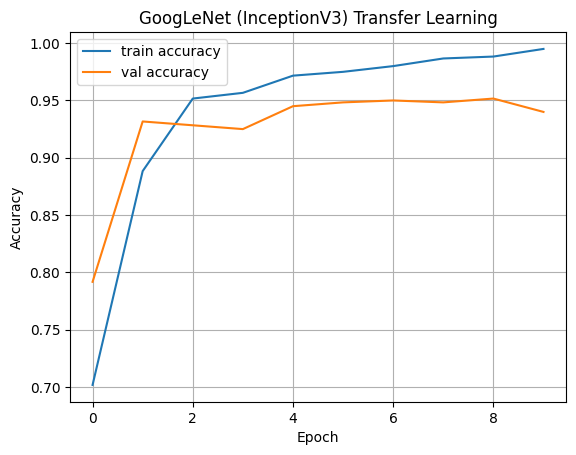

In [78]:
# ============================
# PLOT RESULTS
# ============================

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('GoogLeNet (InceptionV3) Transfer Learning')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
